In [6]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../../..")

%load_ext autoreload
%autoreload 1
%aimport longitudinalProfile.camel.emilia_samples.emilia_peak_finder
from longitudinalProfile.camel.emilia_samples.emilia_peak_finder import *

from longitudinalProfile.camel.peak_finding import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```
eventNb,cellCopyNb,energy(MeV),x(mm),y(mm),z(mm)
0,0,2.09831,0,0,1005.76
0,12,0.103804,5,-8.66025,1005.76
0,59,0.385267,-20,-34.641,1005.76
0,61,4.88201,0,0,1014.68
0,63,0.0669655,-10,0,1014.68
0,71,0.0729746,-5,8.66025,1014.68
0,76,0.389258,-15,-8.66025,1014.68
0,122,12.0832,0,0,1023.6
0,123,0.119211,10,0,1023.6
0,124,1.54461,-10,0,1023.6
0,126,0.00389691,-20,0,1023.6
0,133,0.166018,-5,-8.66025,1023.6
0,134,0.048899,5,-8.66025,1
```

In [7]:
df = readEmiliaSample(EmiliaSampleReader().getHitsFiles()[1])
df

rechits_energy_raw  rechits_x  rechits_y  rechits_z
eventInternal rechits_id                                                     
70            0                     1.687050          0    0.00000    1005.76
              9                     0.081420          5    8.66025    1005.76
              61                    7.961580          0    0.00000    1014.68
              62                    0.117435         10    0.00000    1014.68
              63                    0.067795        -10    0.00000    1014.68
...                                      ...        ...        ...        ...
9999          1399                  0.457118         20   34.64100    1202.00
              1405                  0.123393        -10    0.00000    1210.92
              1408                  0.206434         30    0.00000    1210.92
              1415                  0.416592          5   -8.66025    1210.92
              1474                  0.125113         -5    8.66025    1219.84

[4812032 rows x 4 columns]

In [8]:
len(np.unique(df.index.get_level_values(0)))

10000

In [35]:
processEmiliaSample(df.sort_index().loc[1:2])#.loc[1]

rechits_energy_sum_perLayer  rechits_energy_sum  \
eventInternal rechits_layer                                                    
1             1                                 0.073072           51.295933   
              2                                 1.019399           51.295933   
              3                                 1.335943           51.295933   
              4                                 2.277447           51.295933   
              5                                 3.647894           51.295933   
              6                                 3.779264           51.295933   
              7                                 4.179684           51.295933   
              8                                 3.732089           51.295933   
              9                                 3.812639           51.295933   
              10                                4.457689           51.295933   
              11                                4.778910           51.295933   
              12                                3.735693           51.295933   
              13                                3.535243           51.295933   
              14                                3.294945           51.295933   
              15                                2.554467           51.295933   
              16                                1.415416           51.295933   
              17                                0.901405           51.295933   
              18                                0.718268           51.295933   
              19                                0.684620           51.295933   
              20                                0.319959           51.295933   
              21                                0.486153           51.295933   
              22                                0.177644           51.295933   
              23                                0.189256           51.295933   
              24                                0.178162           51.295933   
              25                                0.010670           51.295933   
2             1                                 0.011395           49.980341   
              2                                 0.128245           49.980341   
              3                                 1.085015           49.980341   
              4                                 1.862289           49.980341   
              5                                 3.597378           49.980341   
              6                                 3.838488           49.980341   
              7                                 6.006785           49.980341   
              8                                 5.080982           49.980341   
              9                                 6.001444           49.980341   
              10                                4.159819           49.980341   
              11                                3.700766           49.980341   
              12                                2.624926           49.980341   
              13                                2.590656           49.980341   
              14                                1.649601           49.980341   
              15                                2.039958           49.980341   
              16                                1.596915           49.980341   
              17                                0.913736           49.980341   
              18                                1.006732           49.980341   
              19                                0.376443           49.980341   
              20                                0.489130           49.980341   
              21                                0.586657           49.980341   
              22                                0.520836           49.980341   
              23                                0.071938           49.980341   
              24             

In [21]:
find_peaks_reverse(processEmiliaSample(df), settings=dict(distance=5,  width=1.5, rel_height=0.7))

eventInternal
1       ([7], {'prominences': [0.44759469922480655], '...
2       ([18], {'prominences': [0.21021417829457362], ...
3       ([23], {'prominences': [0.11144178294573645], ...
4       ([16], {'prominences': [0.20587684496124048], ...
5       ([19], {'prominences': [0.12713054263565893], ...
7       ([5], {'prominences': [0.5873413023255815], 'l...
8       ([21], {'prominences': [0.12431465116279068], ...
11      ([21], {'prominences': [0.1657242248062015], '...
12      ([13], {'prominences': [0.26993471007751957], ...
14      ([8], {'prominences': [1.114488296899225], 'le...
15      ([22], {'prominences': [0.06259635658914729], ...
17      ([20], {'prominences': [0.09695281395348836], ...
18      ([20], {'prominences': [0.10295203100775194], ...
19      ([20], {'prominences': [0.21106279069767445], ...
20      ([20], {'prominences': [0.09822199224806202], ...
21      ([13, 20], {'prominences': [0.591888775193798,...
22      ([15, 20], {'prominences': [0.0217501937984496...


In [42]:
reader = EmiliaSampleReader()
peakFinder = EmiliaPeakFinder(reader, settings=dict(distance=5,  width=1.5, rel_height=0.7))
peakFinder._loadSample(reader.getHitsFiles()[0])
peakFinder._loadSample(reader.getHitsFiles()[1])

In [43]:
peakFinder.dfList[0]

,peaks_info
eventInternal,
1,"([7], {'prominences': [0.44759469922480655], '..."
2,"([18], {'prominences': [0.21021417829457362], ..."
3,"([23], {'prominences': [0.11144178294573645], ..."
4,"([16], {'prominences': [0.20587684496124048], ..."
5,"([19], {'prominences': [0.12713054263565893], ..."
7,"([5], {'prominences': [0.5873413023255815], 'l..."
8,"([21], {'prominences': [0.12431465116279068], ..."
11,"([21], {'prominences': [0.1657242248062015], '..."
12,"([13], {'prominences': [0.26993471007751957], ..."


In [46]:
peakFinder.getResult()[1]

rechits_energy_sum_perLayer  rechits_energy_sum  \
eventInternal rechits_layer                                                    
0             1                                 0.073072           51.295933   
              2                                 1.019399           51.295933   
              3                                 1.335943           51.295933   
              4                                 2.277447           51.295933   
              5                                 3.647894           51.295933   
              6                                 3.779264           51.295933   
              7                                 4.179684           51.295933   
              8                                 3.732089           51.295933   
              9                                 3.812639           51.295933   
              10                                4.457689           51.295933   
              11                                4.778910           51.295933   
              12                                3.735693           51.295933   
              13                                3.535243           51.295933   
              14                                3.294945           51.295933   
              15                                2.554467           51.295933   
              16                                1.415416           51.295933   
              17                                0.901405           51.295933   
              18                                0.718268           51.295933   
              19                                0.684620           51.295933   
              20                                0.319959           51.295933   
              21                                0.486153           51.295933   
              22                                0.177644           51.295933   
              23                                0.189256           51.295933   
              24                                0.178162           51.295933   
              25                                0.010670           51.295933   
...                                                  ...                 ...   
8662          1                                 0.044480           48.578257   
              2                                 0.306298           48.578257   
              3                                 0.783163           48.578257   
              4                                 2.306502           48.578257   
              5                                 3.008173           48.578257   
              6                                 6.178191           48.578257   
              7                                 6.034934           48.578257   
              8                                 6.169210           48.578257   
              9                                 4.551971           48.578257   
              10                                3.984599           48.578257   
              11                                3.149265           48.578257   
              12                                2.975517           48.578257   
              13                                1.924329           48.578257   
              14                                1.604035           48.578257   
              15                                1.493177           48.578257   
              16                                1.629508           48.578257   
              17                                0.920655           48.578257   
              18                                0.333486           48.578257   
              19                                0.716982           48.578257   
              20                                0.110219           48.578257   
              21                                0.191603           48.578257   
              22                                0.019145           48.578257   
              23             

In [25]:
peakFinder.perLayerDfList[0]

,rechits_layer,rechits_energy_sum_perLayer,rechits_energy_sum,rechits_ratioFirstToSecondMostEnergeticHitsPerLayer
eventInternal,,,,
1,1,0.073072,51.295933,NaN
1,2,1.019399,51.295933,7.973518
1,3,1.335943,51.295933,11.404076
1,4,2.277447,51.295933,12.222964
1,5,3.647894,51.295933,10.306247
1,6,3.779264,51.295933,10.192713
1,7,4.179684,51.295933,7.929027
1,8,3.732089,51.295933,4.939716
1,9,3.812639,51.295933,11.411749


In [28]:
df_true = pd.read_csv("/data_CMS_upgrade/hgcnn/d1/elm_E50_theta0/primaryParticles_d1_elm_E50_theta0_1.dat",
    names=["eventInternal", "partName", "energy", "thetaGunDir", "phiGunDir", "xHitPos", "yHitPos", "zHitPos", "globalTime"], header=0,
    index_col=0
    ).sort_index()
df_true

,partName,energy,thetaGunDir,phiGunDir,xHitPos,yHitPos,zHitPos,globalTime
eventInternal,,,,,,,,
0,e-,50,0,0,-0.003469,-0.000709,1005.44,3.353790e-09
1,e-,50,0,0,-0.009868,-0.005896,1005.44,3.353790e-09
2,e-,50,0,0,0.001007,0.000569,1005.44,3.353790e-09
3,e-,50,0,0,0.010064,0.000371,1005.44,3.353790e-09
4,e-,50,0,0,-0.008048,0.004644,1005.44,3.353790e-09
...,...,...,...,...,...,...,...,...
9995,e-,50,0,0,-0.002339,0.009087,1005.44,3.353790e-09
9996,e-,50,0,0,-0.003133,-0.012475,1005.44,3.353790e-09
9997,e-,50,0,0,0.001603,0.001235,1005.44,3.353790e-09


In [11]:
df_hits

energy   x         y        z
eventNb cellNb                                 
0       0       2.098310   0   0.00000  1005.76
        12      0.103804   5  -8.66025  1005.76
        59      0.385267 -20 -34.64100  1005.76
        61      4.882010   0   0.00000  1014.68
        63      0.066965 -10   0.00000  1014.68
...                  ...  ..       ...      ...
9999    1491    0.094611  10  17.32050  1219.84
        1492    0.261180 -10  17.32050  1219.84
        1495    0.190593  20  17.32050  1219.84
        1505    0.118895  -5 -25.98080  1219.84
        1506    0.341377   5 -25.98080  1219.84

[4812867 rows x 4 columns]

In [12]:
df_geometry = pd.read_csv("/data_CMS_upgrade/hgcnn/d1/geometry_d1.dat")
df_geometry

,l,cellId,x,y,z
0,1,0,0,0.000,1005.76
1,1,1,10,0.000,1005.76
2,1,2,-10,0.000,1005.76
3,1,3,20,0.000,1005.76
4,1,4,-20,0.000,1005.76
...,...,...,...,...,...
1520,25,1520,10,-34.641,1219.84
1521,25,1521,20,34.641,1219.84
1522,25,1522,-20,34.641,1219.84
1523,25,1523,-20,-34.641,1219.84


<Axes: xlabel='x', ylabel='y'>

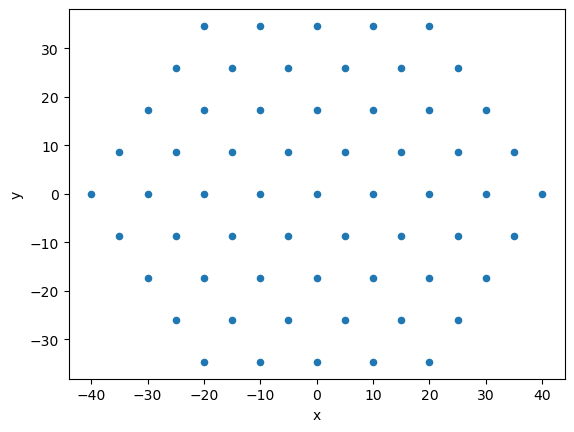

In [16]:
df_geometry[df_geometry.z < 1006].plot(x="x", y="y", kind="scatter")